### 📊 Task 2 — Quantitative Analysis of Stock Price Movements

This notebook performs a full quantitative analysis on six major stocks:  
**AAPL, AMZN, GOOG, META, MSFT, NVDA**

### Objectives
- Load and clean stock market data  
- Generate technical indicators  
- Visualize price trends  
- Analyze market behavior  
- Compare volatility and correlations  
- Prepare processed datasets for downstream sentiment–price modeling  


### Code: Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import pynance as py
import quantstats as qs
import os

# Load all CSV files
DATA_PATH = "../data"

tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
data = {}

for t in tickers:
    file_path = os.path.join(DATA_PATH, f"{t}.csv")
    df = pd.read_csv(file_path)
    
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")

    data[t] = df


### EDA & Price/Volume

### ============================================
### EDA: Price and Volume Analysis
### ============================================

This section performs exploratory data analysis (EDA) on all six stocks.
For each ticker:
- Display descriptive statistics  
- Plot Close Price  
- Plot Volume  

The process runs in a loop so it works for all tickers efficiently.




=========== AAPL — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,3774,2016-07-01 03:40:32.432432128,2009-01-02 00:00:00,2012-09-28 18:00:00,2016-06-30 12:00:00,2020-03-31 18:00:00,2023-12-29 00:00:00,NaN
Close,3774.0,53.841169,2.345299,15.050355,26.975808,74.664204,196.256592,55.064042
High,3774.0,54.383801,2.459265,15.183043,27.168844,75.252383,197.75246,55.627235
Low,3774.0,53.247465,2.345299,14.901886,26.836844,73.553555,195.156944,54.440128
Open,3774.0,53.801628,2.380989,15.00758,27.010205,74.127927,196.167437,55.009182
Volume,3774.0,264063973.900371,24048300.0,95818450.0,166734800.0,377741000.0,1880998000.0,234562924.571195


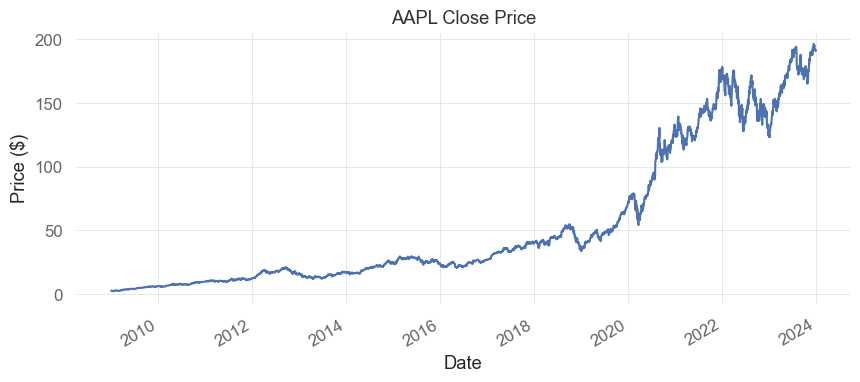

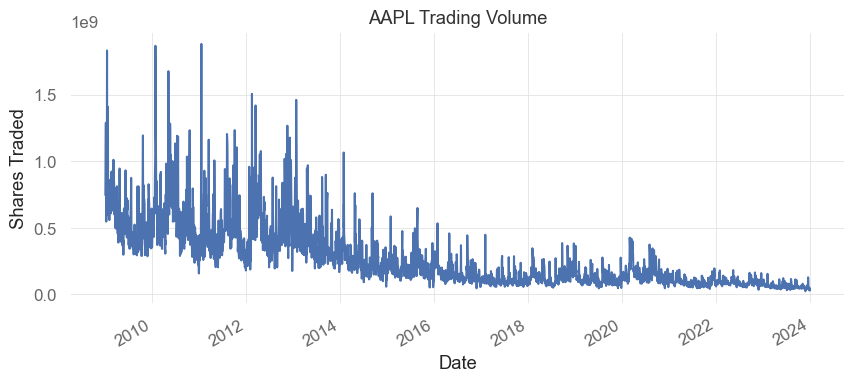



=========== AMZN — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,3774,2016-07-01 03:40:32.432432128,2009-01-02 00:00:00,2012-09-28 18:00:00,2016-06-30 12:00:00,2020-03-31 18:00:00,2023-12-29 00:00:00,NaN
Close,3774.0,59.408094,2.422,12.1945,36.359499,96.638248,186.570496,54.918541
High,3774.0,60.11639,2.505,12.30025,36.489,97.75,188.654007,55.610783
Low,3774.0,58.669489,2.3815,12.042125,36.004,95.379747,184.839493,54.233978
Open,3774.0,59.423925,2.428,12.146625,36.3225,96.663498,187.199997,54.953769
Volume,3774.0,91851835.241123,17626000.0,55863500.0,75206000.0,108606000.0,1166116000.0,60575526.096635


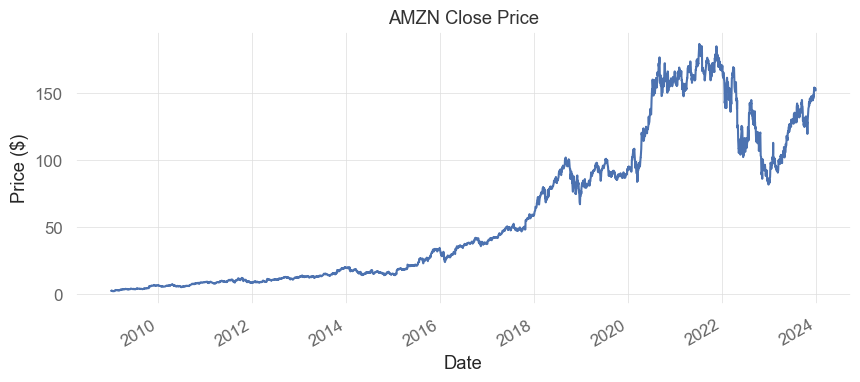

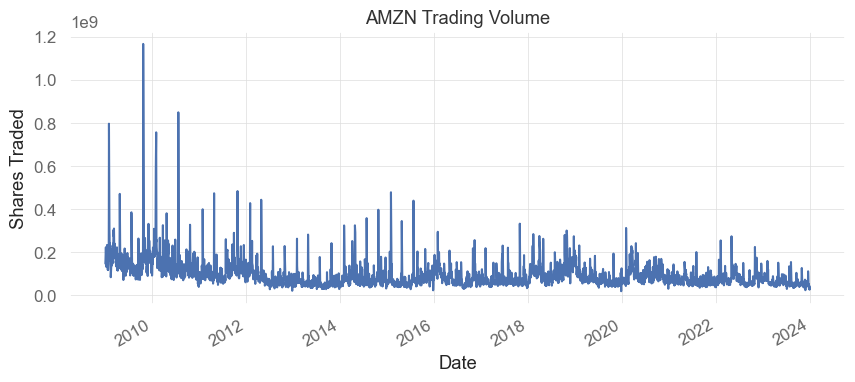



=========== GOOG — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,3774,2016-07-01 03:40:32.432432128,2009-01-02 00:00:00,2012-09-28 18:00:00,2016-06-30 12:00:00,2020-03-31 18:00:00,2023-12-29 00:00:00,NaN
Close,3774.0,50.779971,6.99449,16.851089,37.327805,69.191502,149.684662,39.417443
High,3774.0,51.285163,7.40884,16.984424,37.647668,70.084894,151.066223,39.853299
Low,3774.0,50.252347,6.99449,16.699388,37.038786,68.368832,148.868758,38.97505
Open,3774.0,50.753534,7.133018,16.827651,37.38839,69.062883,150.831319,39.389736
Volume,3774.0,61230955.065183,158434.0,25748626.0,37977983.0,82697814.0,595214680.0,55373958.820092


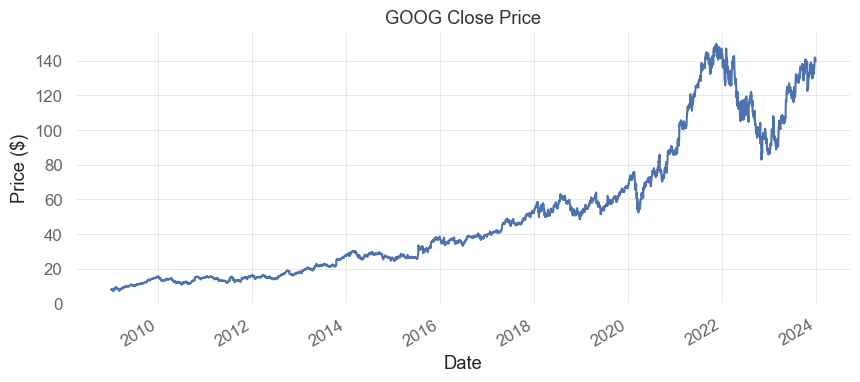

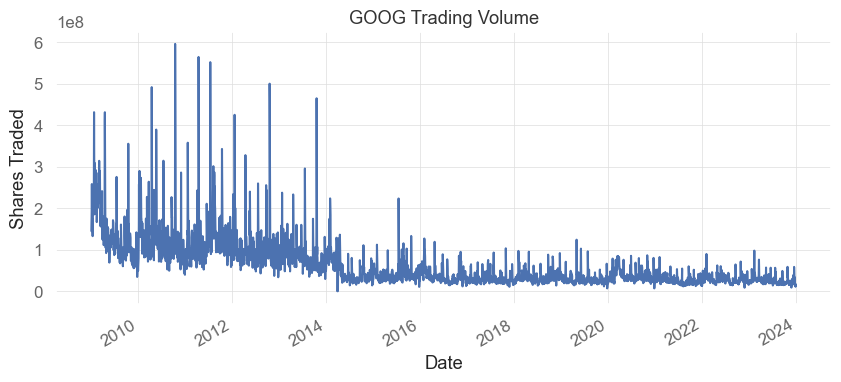



=========== META — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,2923,2018-03-10 16:42:31.898733824,2012-05-18 00:00:00,2015-04-16 12:00:00,2018-03-12 00:00:00,2021-02-03 12:00:00,2023-12-29 00:00:00,NaN
Close,2923.0,156.72744,17.621368,80.275124,152.579376,203.550171,379.838379,90.368766
High,2923.0,158.690484,18.158061,80.970839,154.6367,206.372783,381.975166,91.470736
Low,2923.0,154.685098,17.442471,79.663892,150.730785,200.548679,376.488998,89.222981
Open,2923.0,156.653626,17.969224,80.275126,152.698669,202.963782,379.341431,90.308834
Volume,2923.0,30606153.267191,5467500.0,16337300.0,22953900.0,35227400.0,573576400.0,26371571.640965


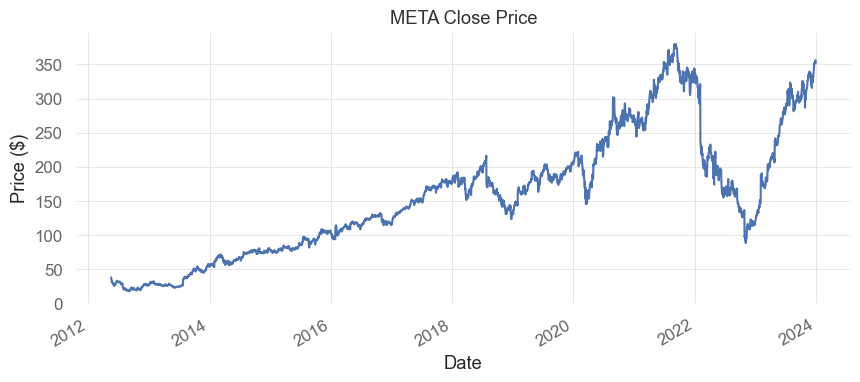

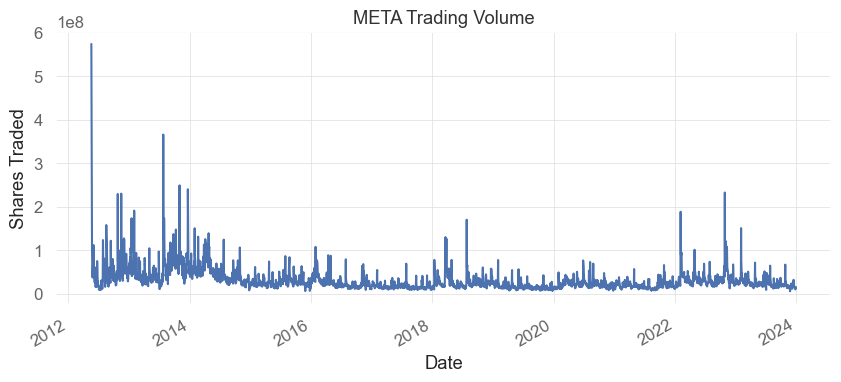



=========== MSFT — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,3774,2016-07-01 03:40:32.432432128,2009-01-02 00:00:00,2012-09-28 18:00:00,2016-06-30 12:00:00,2020-03-31 18:00:00,2023-12-29 00:00:00,NaN
Close,3774.0,102.458692,11.159394,23.72356,48.97156,165.831585,377.78363,100.530006
High,3774.0,103.440768,11.505594,23.914675,49.195981,166.967866,379.363,101.527406
Low,3774.0,101.374441,10.953148,23.498127,48.606149,162.911557,373.301945,99.431276
Open,3774.0,102.420838,11.196224,23.721387,48.89349,166.002089,378.829959,100.496751
Volume,3774.0,38957536.751457,7425600.0,23984625.0,32791100.0,48654000.0,319317900.0,22456261.397114


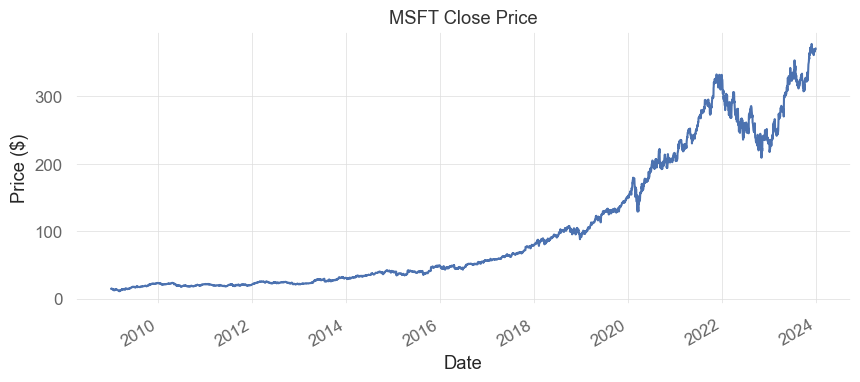

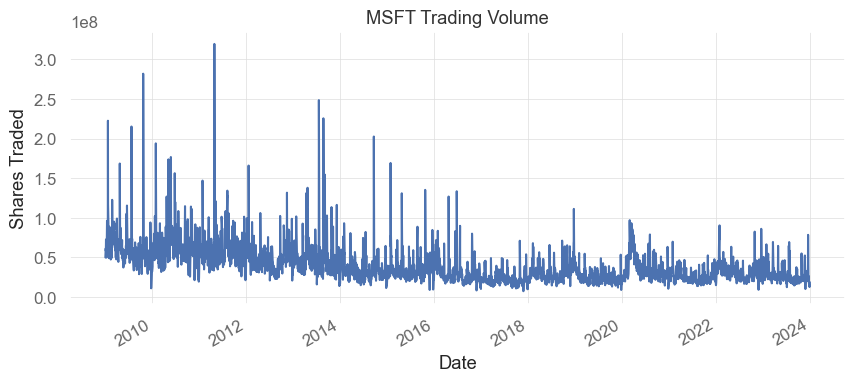



=========== NVDA — Summary Statistics ===========


,count,mean,min,25%,50%,75%,max,std
Date,3774,2016-07-01 03:40:32.432432128,2009-01-02 00:00:00,2012-09-28 18:00:00,2016-06-30 12:00:00,2020-03-31 18:00:00,2023-12-29 00:00:00,NaN
Close,3774.0,6.796822,0.165269,0.357397,1.167304,7.018725,50.379307,10.659754
High,3774.0,6.915713,0.171228,0.362422,1.176017,7.091671,50.518225,10.843532
Low,3774.0,6.666721,0.162289,0.351743,1.157976,6.849259,49.387239,10.461388
Open,3774.0,6.793541,0.165269,0.357017,1.166935,6.939958,50.182284,10.65914
Volume,3774.0,523075306.836248,45644000.0,318851000.0,449558500.0,641977000.0,3692928000.0,320575996.056308


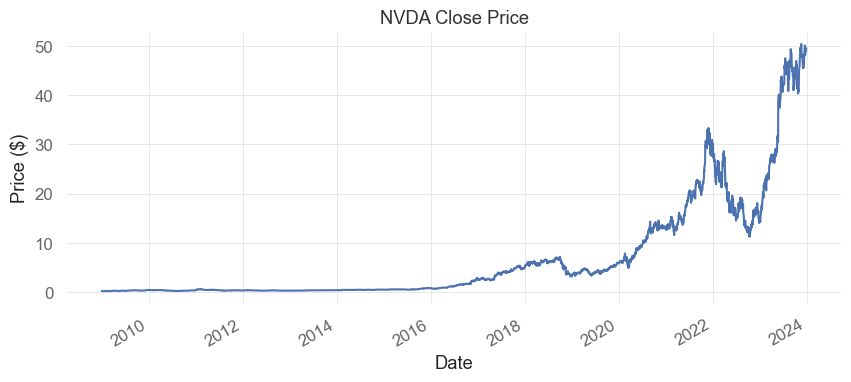

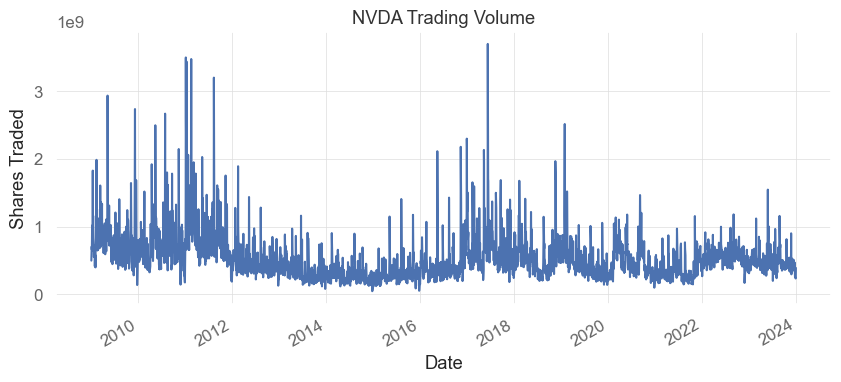

In [2]:
# ============================================
# EDA: Price and Volume for each ticker
# ============================================

for t, df in data.items():
    print(f"\n\n=========== {t} — Summary Statistics ===========")
    display(df.describe().T)

    # Plot Close Price
    df.set_index("Date")["Close"].plot(
        title=f"{t} Close Price",
        figsize=(10, 4)
    )
    plt.ylabel("Price ($)")
    plt.xlabel("Date")
    plt.show()

    # Plot Volume
    df.set_index("Date")["Volume"].plot(
        title=f"{t} Trading Volume",
        figsize=(10, 4)
    )
    plt.ylabel("Shares Traded")
    plt.xlabel("Date")
    plt.show()


### TA-Lib Indicators
### ============================================
### Step 3 — Technical Indicators Using TA-Lib
### ============================================

For each ticker:

- Use Adjusted Close if available, otherwise Close  
- Compute:
  - SMA_20  
  - SMA_50  
  - EMA_20  
  - RSI_14  
  - MACD (MACD, Signal, Histogram)

Indicators are added directly to each dataframe inside the `data` dictionary.


In [10]:
# ============================================
# TA-Lib indicators for each ticker
# ============================================

for t, df in data.items():

    # Select price column
    if "Adj Close" in df.columns:
        price = df["Adj Close"]
    else:
        price = df["Close"]

    # --- Moving Averages ---
    df["SMA_20"] = talib.SMA(price, timeperiod=20)
    df["SMA_50"] = talib.SMA(price, timeperiod=50)
    df["EMA_20"] = talib.EMA(price, timeperiod=20)

    # --- RSI ---
    df["RSI_14"] = talib.RSI(price, timeperiod=14)

    # --- MACD ---
    df["MACD"], df["MACD_signal"], df["MACD_hist"] = talib.MACD(
        price,
        fastperiod=12,
        slowperiod=26,
        signalperiod=9
    )

    # save back to dict
    data[t] = df

print("TA-Lib indicators added successfully for all tickers.")
for t, df in data.items():
    cols = ["Date","High", "Low", "Close", "Open","SMA_20", "SMA_50", "EMA_20", "RSI_14", "MACD", "MACD_signal", "MACD_hist", "BB_upper", "BB_middle", "BB_lower"]
    available = [c for c in cols if c in df.columns]
    print(f"\n--- {t} — last 5 rows (showing indicators) ---")
    display(df[available].tail(5))


TA-Lib indicators added successfully for all tickers.

--- AAPL — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
3769,2023-12-22,193.581821,191.164647,191.788757,193.353962,191.856618,183.572859,191.510231,54.672784,2.633141,3.235256,-0.602115,197.478146,191.856618,186.235090
3770,2023-12-26,192.076049,191.025969,191.243912,191.798670,192.018094,183.858864,191.484867,53.090049,2.304751,3.049155,-0.744404,197.367843,192.018094,186.668345
3771,2023-12-27,191.689703,189.302247,191.342972,190.689158,192.154308,184.149424,191.471353,53.354446,2.029104,2.845145,-0.816041,197.285152,192.154308,187.023465
3772,2023-12-28,192.838849,191.362784,191.768951,192.323710,192.362839,184.479567,191.499696,54.540999,1.823998,2.640915,-0.816918,197.056446,192.362839,187.669231
3773,2023-12-29,192.581275,189.936256,190.728775,192.085953,192.490633,184.814828,191.426275,51.121347,1.559539,2.424640,-0.865101,196.848102,192.490633,188.133164



--- AMZN — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
3769,2023-12-22,154.350006,152.710007,153.419998,153.770004,148.578999,141.2430,148.860492,64.115558,3.135958,2.873052,0.262905,154.696716,148.578999,142.461283
3770,2023-12-26,153.979996,153.029999,153.410004,153.559998,148.863000,141.7154,149.293779,64.085644,3.118650,2.922172,0.196478,155.314929,148.863000,142.411071
3771,2023-12-27,154.779999,153.119995,153.339996,153.559998,149.178500,142.1312,149.679133,63.860893,3.063965,2.950530,0.113434,155.854273,149.178500,142.502726
3772,2023-12-28,154.080002,152.949997,153.380005,153.720001,149.531499,142.5694,150.031597,63.938728,2.989395,2.958303,0.031092,156.311164,149.531499,142.751835
3773,2023-12-29,153.889999,151.029999,151.940002,153.100006,149.824000,143.0456,150.213350,59.012257,2.782032,2.923049,-0.141017,156.488309,149.824000,143.159691



--- GOOG — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
3769,2023-12-22,142.276397,141.089511,141.750000,141.164014,135.009596,133.914786,135.854576,64.953309,1.412015,0.572046,0.839969,141.503046,135.009596,128.516146
3770,2023-12-26,142.966658,141.531472,141.849304,142.008205,135.246477,133.999010,136.425503,65.115870,1.706565,0.798950,0.907615,142.346688,135.246477,128.146265
3771,2023-12-27,142.345911,140.092320,140.478683,141.859236,135.386520,134.017881,136.811520,60.916026,1.808553,1.000870,0.807682,142.777559,135.386520,127.995480
3772,2023-12-28,141.303025,139.870824,140.319748,140.885881,135.628861,134.023641,137.145637,60.429303,1.855168,1.171730,0.683438,143.326809,135.628861,127.930914
3773,2023-12-29,140.473710,138.949139,139.972137,139.723837,135.976979,134.056417,137.414827,59.313063,1.842820,1.305948,0.536872,143.798395,135.976979,128.155563



--- META — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
2918,2023-12-22,355.011477,349.068105,351.224823,353.401377,332.302945,323.317843,335.581703,67.333885,6.945367,4.729907,2.215461,354.085026,332.302945,310.520864
2919,2023-12-26,354.792827,351.284456,352.655975,352.814999,333.303278,324.115724,337.207824,68.187000,7.436800,5.271285,2.165514,356.825215,333.303278,309.781340
2920,2023-12-27,356.800387,353.132994,355.637543,353.888347,334.239505,324.844828,338.963036,69.947874,7.974921,5.812012,2.162908,359.674389,334.239505,308.804621
2921,2023-12-28,359.682686,355.617749,356.124634,357.496184,335.537503,325.527023,340.597473,70.237702,8.344500,6.318510,2.025990,362.605290,335.537503,308.469716
2922,2023-12-29,357.794292,349.664418,351.791290,356.790470,336.869788,326.262290,341.663551,64.296803,8.193282,6.693464,1.499818,364.379857,336.869788,309.359718



--- MSFT — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
3769,2023-12-22,370.360181,367.921911,369.767883,368.879451,368.730389,355.078464,366.580145,56.363342,2.805416,3.840081,-1.034664,376.381103,368.730389,361.079676
3770,2023-12-26,372.097540,368.701731,369.846832,370.182461,368.535426,356.018111,366.891259,56.447998,2.767033,3.625471,-0.858438,375.856574,368.535426,361.214278
3771,2023-12-27,370.241738,368.020642,369.264465,368.889342,368.109468,356.849368,367.117278,55.591261,2.658971,3.432171,-0.773200,374.098950,368.109468,362.119987
3772,2023-12-28,371.623696,369.353256,370.458862,370.547702,367.933260,357.715942,367.435524,57.031664,2.639285,3.273594,-0.634309,373.406273,367.933260,362.460247
3773,2023-12-29,372.314805,368.682088,371.209198,371.169703,367.791606,358.635943,367.794922,57.954296,2.653640,3.149603,-0.495963,372.747004,367.791606,362.836208



--- NVDA — last 5 rows (showing indicators) ---


,Date,High,Low,Close,Open,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower
3769,2023-12-22,49.358247,48.442706,48.805527,49.170342,47.706983,46.257777,48.024644,55.352119,0.634352,0.564438,0.069914,50.152737,47.706983,45.261229
3770,2023-12-26,49.575137,48.935459,49.254299,48.943454,47.759019,46.334178,48.141754,57.245971,0.655689,0.582688,0.073001,50.288523,47.759019,45.229515
3771,2023-12-27,49.655100,49.060397,49.392231,49.486186,47.838989,46.400666,48.260847,57.837928,0.675937,0.601338,0.074599,50.466927,47.838989,45.211051
3772,2023-12-28,49.859003,49.387239,49.497185,49.618126,47.908266,46.512367,48.378593,58.310919,0.692470,0.619564,0.072906,50.632585,47.908266,45.183947
3773,2023-12-29,49.971949,48.726571,49.497185,49.788039,48.046003,46.658888,48.485126,58.310919,0.697532,0.635158,0.062374,50.799025,48.046003,45.292980


### Automatic “Quick Reading” Summary Generator
### ============================================
### Step 4 — Quick Reading: Price, Trend, Momentum
### ============================================

This section automatically generates a short, human-readable technical summary
for each ticker based on TA-Lib indicators:
- Price action (latest 3–5 days)
- Trend direction (SMA_20 vs SMA_50)
- Short-term strength (EMA_20 vs SMA_20)
- RSI interpretation (overbought/oversold)
- MACD momentum pattern



In [4]:
# ============================================
# Quick Reading Summary for All Tickers
# ============================================

def r(x):
    """Round to 2 decimals safely."""
    try:
        return round(float(x), 2)
    except:
        return x

for t, df in data.items():
    print(f"\n\n====================== {t} — Quick Reading ======================")

    # Use last 5 rows for reading
    last = df.tail(5)

    # -------- Price Action --------
    start_price = last["Close"].iloc[0]
    end_price = last["Close"].iloc[-1]

    price_action = f"{r(start_price)} → {r(end_price)}"

    print(f"\nPrice action: {t} moved from {price_action} over the last 5 days.")

    # -------- Trend (SMA 20 vs SMA 50) --------
    sma20 = last["SMA_20"].iloc[-1]
    sma50 = last["SMA_50"].iloc[-1]

    if sma20 > sma50:
        trend = "Bullish medium-term trend (SMA_20 above SMA_50)"
    else:
        trend = "Bearish/weak trend (SMA_20 below SMA_50)"

    print(f"\nTrend: {trend} — SMA_20={r(sma20)}, SMA_50={r(sma50)}")

    # -------- Short-term strength (EMA_20 vs SMA_20) --------
    ema20 = last["EMA_20"].iloc[-1]

    if ema20 > sma20:
        st_strength = "Short-term strength: EMA_20 is above SMA_20 → strong recent prices."
    else:
        st_strength = "Short-term weakness: EMA_20 is below SMA_20 → cooling momentum."

    print(f"\n{st_strength}")

    # -------- RSI Interpretation --------
    rsi = last["RSI_14"].iloc[-1]

    if rsi > 70:
        rsi_status = "RSI > 70 → Overbought (may pull back)"
    elif rsi < 30:
        rsi_status = "RSI < 30 → Oversold (may rebound)"
    elif 50 <= rsi <= 70:
        rsi_status = "RSI 50–70 → Bullish momentum"
    else:
        rsi_status = "RSI 30–50 → Bearish / weak momentum"

    print(f"\nRSI (14): {r(rsi)} → {rsi_status}")

    # -------- MACD Interpretation --------
    macd = last["MACD"].iloc[-1]
    signal = last["MACD_signal"].iloc[-1]

    if macd > signal:
        macd_comment = "MACD > Signal → Bullish momentum"
    else:
        macd_comment = "MACD < Signal → Bearish / momentum fading"

    print(f"\nMACD: {r(macd)}, Signal: {r(signal)} → {macd_comment}")

    print("\n===================================================================\n")




====================== AAPL — Quick Reading ======================

Price action: AAPL moved from 191.79 → 190.73 over the last 5 days.

Trend: Bullish medium-term trend (SMA_20 above SMA_50) — SMA_20=192.49, SMA_50=184.81

Short-term weakness: EMA_20 is below SMA_20 → cooling momentum.

RSI (14): 51.12 → RSI 50–70 → Bullish momentum

MACD: 1.56, Signal: 2.42 → MACD < Signal → Bearish / momentum fading




====================== AMZN — Quick Reading ======================

Price action: AMZN moved from 153.42 → 151.94 over the last 5 days.

Trend: Bullish medium-term trend (SMA_20 above SMA_50) — SMA_20=149.82, SMA_50=143.05

Short-term strength: EMA_20 is above SMA_20 → strong recent prices.

RSI (14): 59.01 → RSI 50–70 → Bullish momentum

MACD: 2.78, Signal: 2.92 → MACD < Signal → Bearish / momentum fading




====================== GOOG — Quick Reading ======================

Price action: GOOG moved from 141.75 → 139.97 over the last 5 days.

Trend: Bullish medium-term trend (SMA

### Technical Indicator Visualizations

### Price + SMA + Bollinger Bands
### ============================================
### Price Action + SMA + Bollinger Bands
### ============================================

For each ticker:
- Plot Close price
- Add SMA 20 & SMA 50 trend indicators
- Add Bollinger Bands (Upper, Middle, Lower)

Bollinger Bands help detect volatility expansion, squeeze patterns,
and mean-reversion opportunities.


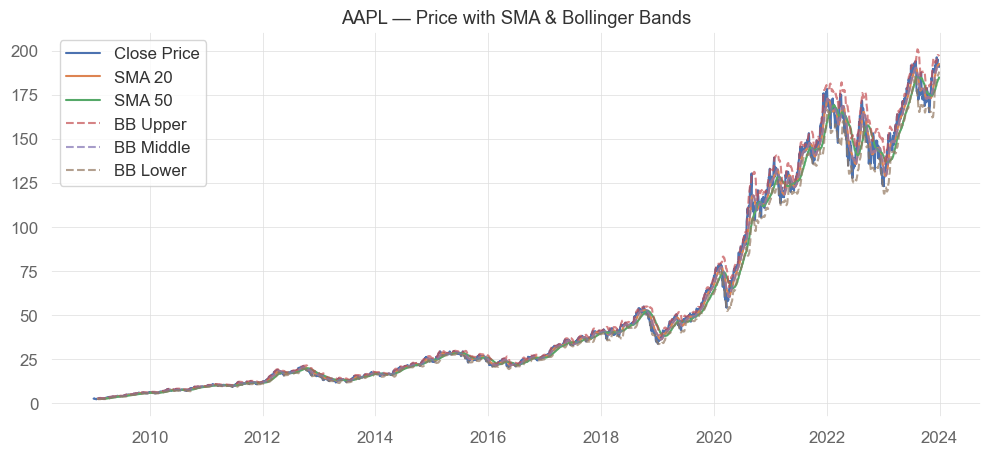

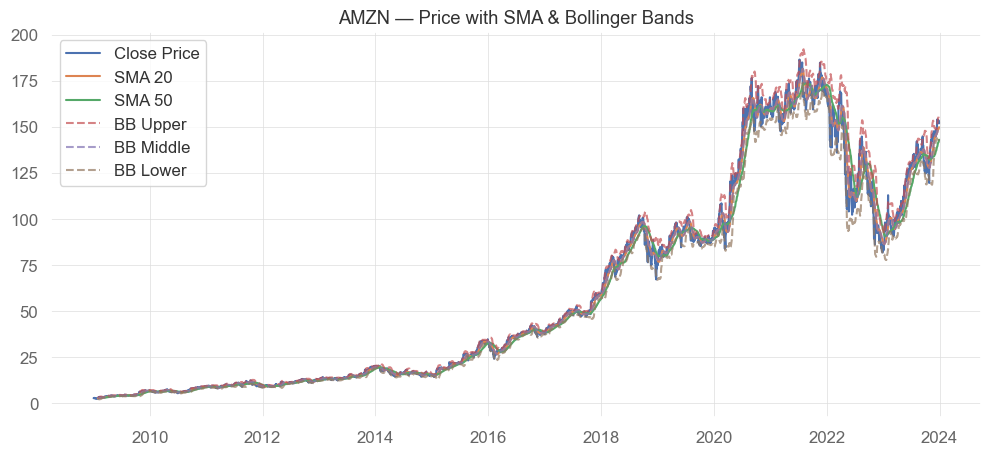

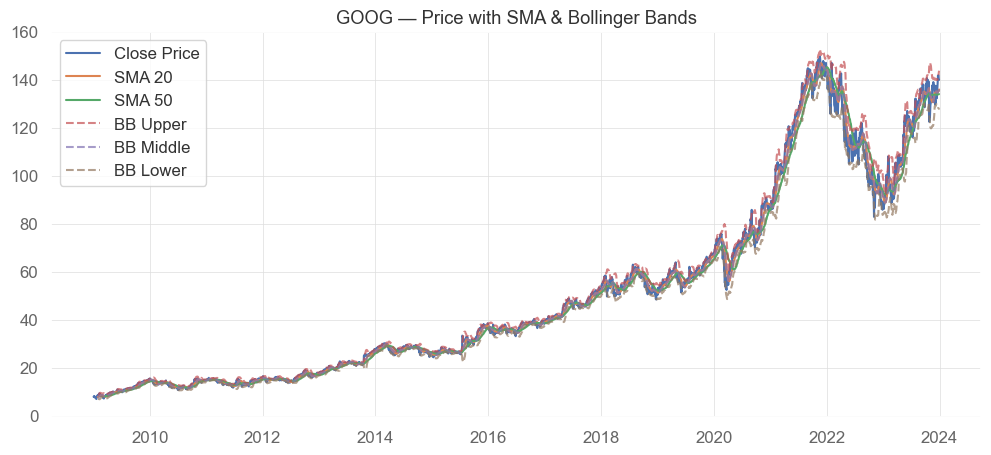

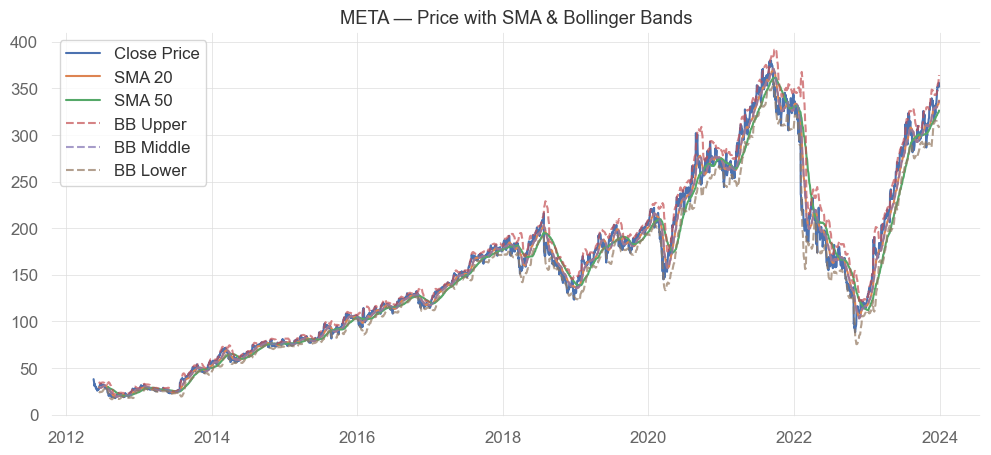

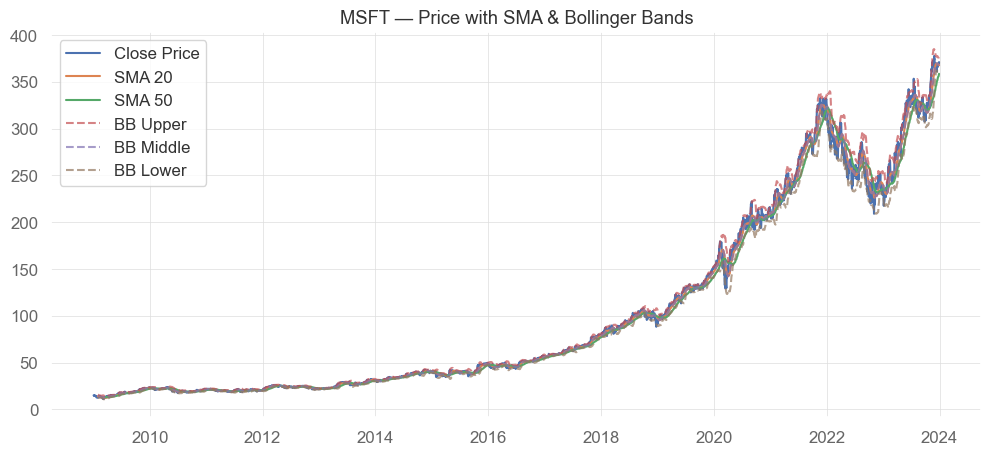

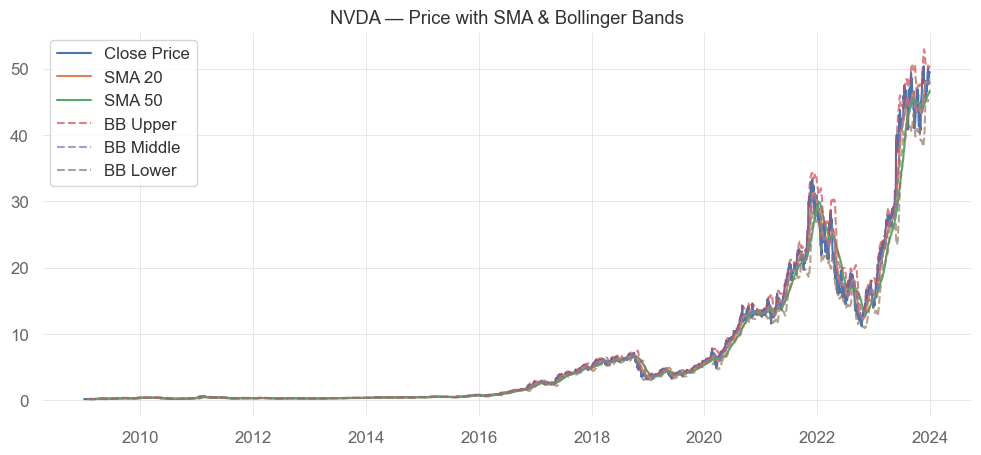

In [5]:
# ============================================
# Price + SMA + Bollinger Bands
# ============================================

for t, df in data.items():

    price = df["Adj Close"] if "Adj Close" in df.columns else df["Close"]

    # Bollinger Bands (TA-Lib)
    df["BB_upper"], df["BB_middle"], df["BB_lower"] = talib.BBANDS(
        price,
        timeperiod=20,
        nbdevup=2,
        nbdevdn=2,
        matype=0
    )

    plt.figure(figsize=(12,5))
    plt.plot(df["Date"], price, label="Close Price")
    plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
    plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
    plt.plot(df["Date"], df["BB_upper"], label="BB Upper", linestyle="--", alpha=0.7)
    plt.plot(df["Date"], df["BB_middle"], label="BB Middle", linestyle="--", alpha=0.7)
    plt.plot(df["Date"], df["BB_lower"], label="BB Lower", linestyle="--", alpha=0.7)

    plt.title(f"{t} — Price with SMA & Bollinger Bands")
    plt.legend()
    plt.grid(True)
    plt.show()


### RSI Plot (Overbought / Oversold)

RSI (Relative Strength Index)

RSI shows momentum strength:
- RSI > 70 → Overbought (price may drop)
- RSI < 30 → Oversold (price may rise)
- RSI 50–70 → Bullish momentum
- RSI 30–50 → Weak / bearish momentum

Each ticker gets its own RSI plot with the 30/70 thresholds.



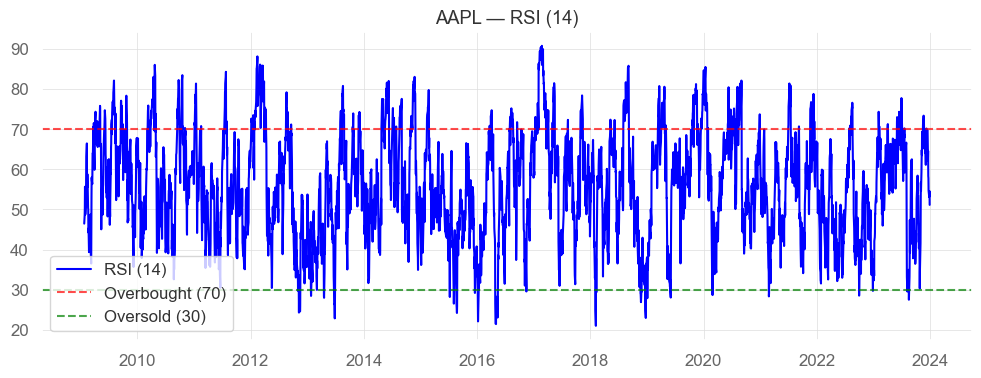

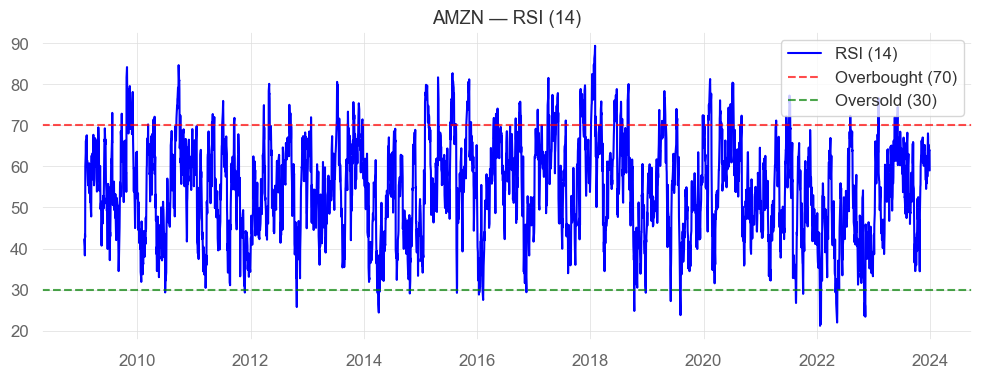

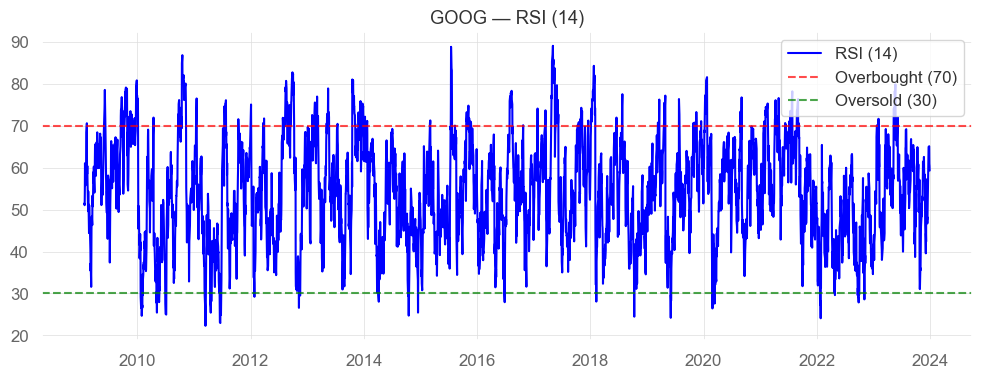

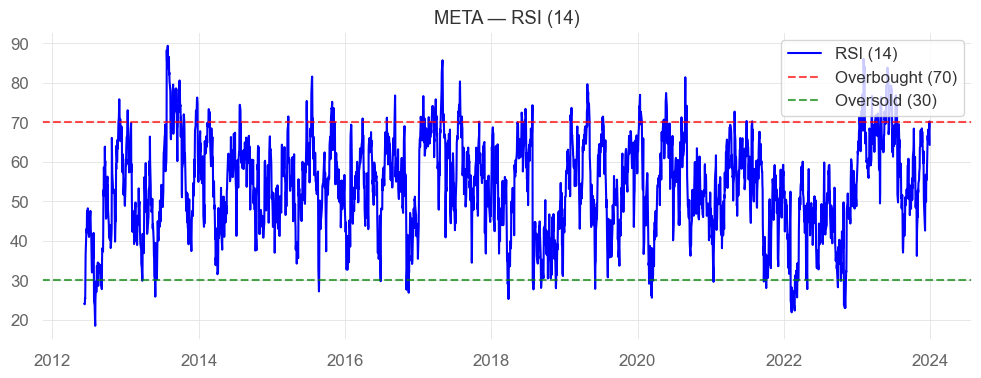

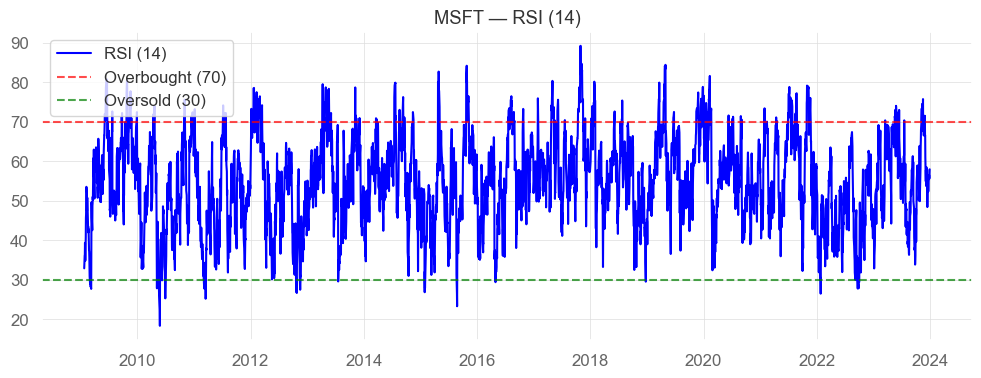

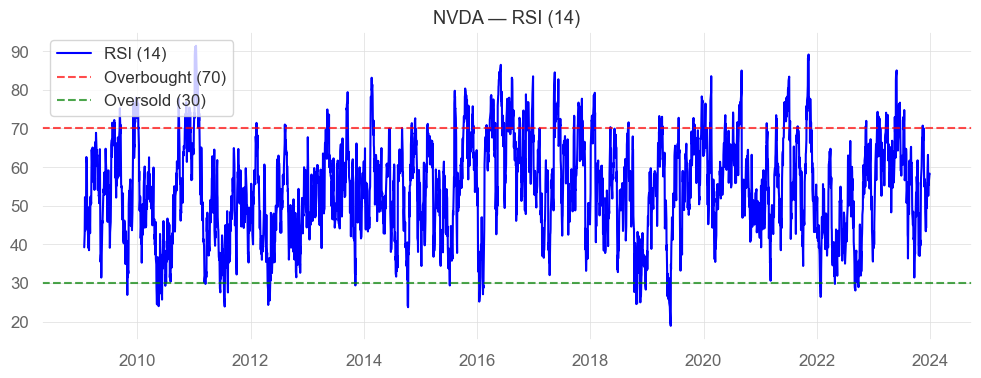

In [6]:
# ============================================
# RSI Plots for All Tickers
# ============================================

for t, df in data.items():

    plt.figure(figsize=(12,4))
    plt.plot(df["Date"], df["RSI_14"], label="RSI (14)", color="blue")

    # Thresholds
    plt.axhline(70, color="red", linestyle="--", alpha=0.7, label="Overbought (70)")
    plt.axhline(30, color="green", linestyle="--", alpha=0.7, label="Oversold (30)")

    plt.title(f"{t} — RSI (14)")
    plt.legend()
    plt.grid(True)
    plt.show()


### MACD Plot (Trend & Momentum)
MACD Trend & Momentum

MACD is one of the strongest momentum indicators:
- MACD above Signal → bullish momentum
- MACD below Signal → momentum weakening
- Histogram shows momentum acceleration/deceleration

Charts include:
- MACD line
- Signal line
- Histogram

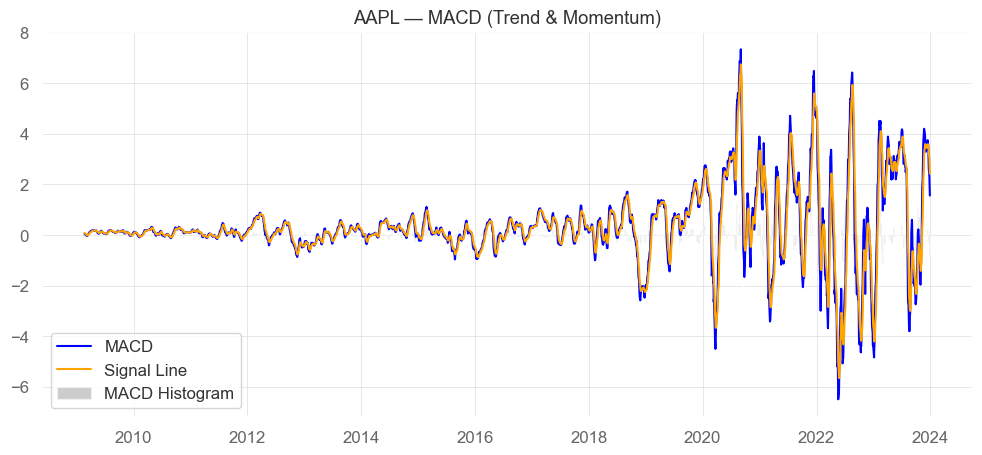

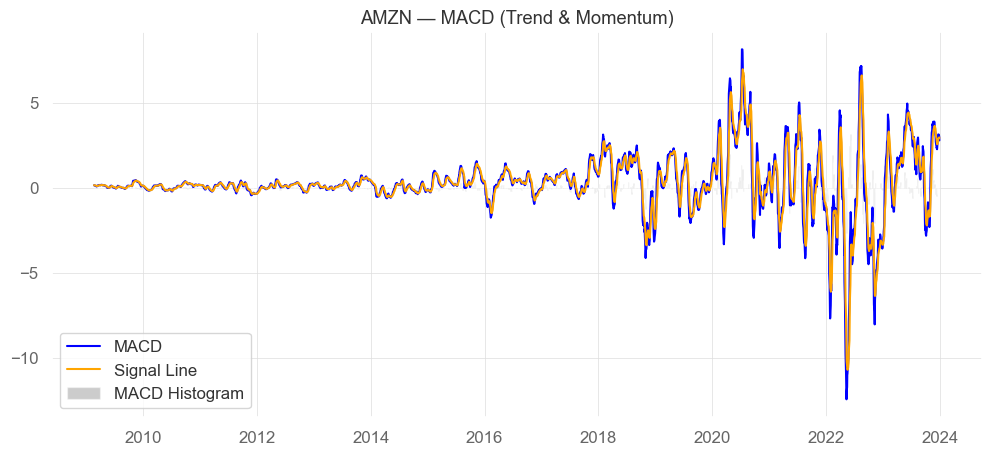

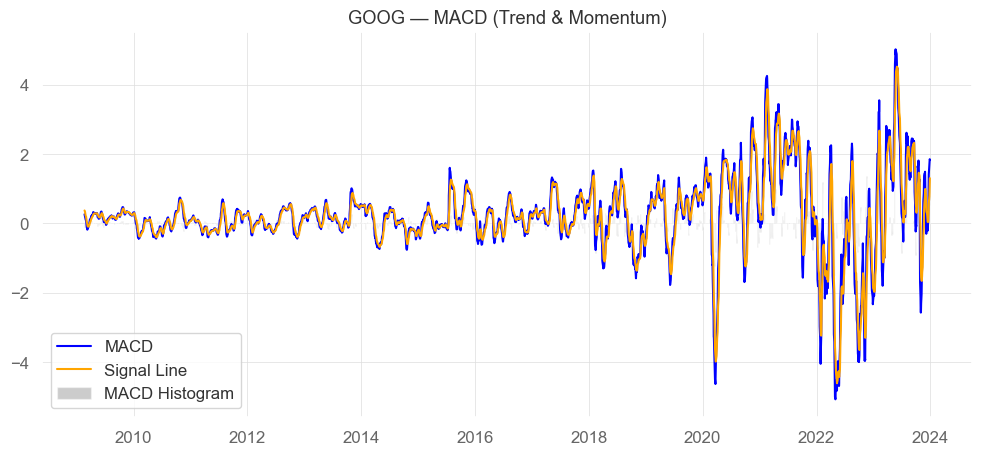

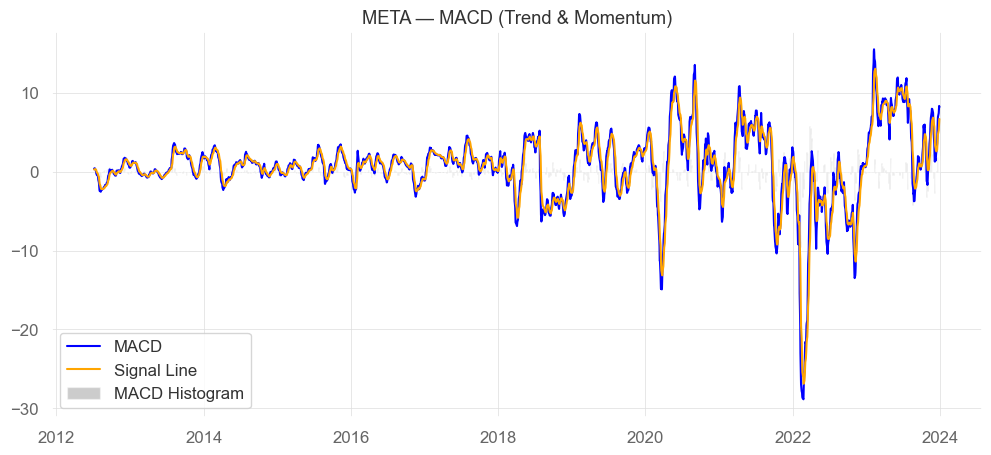

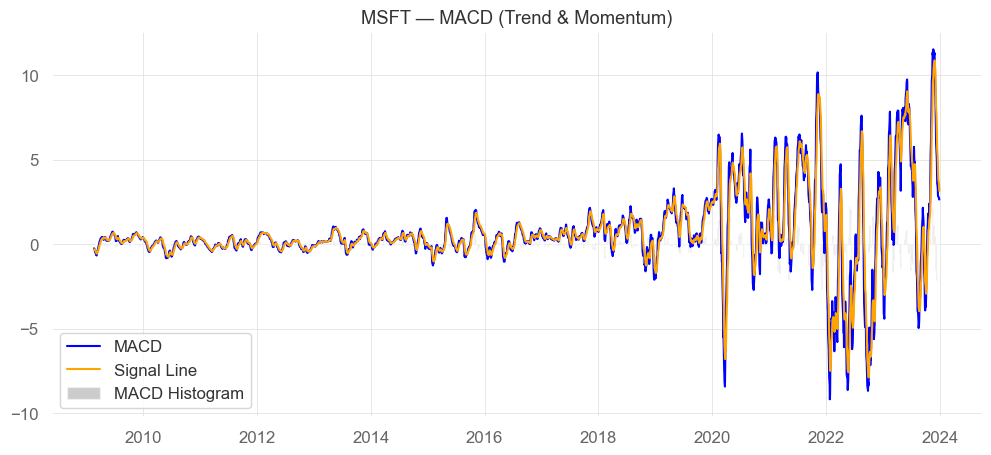

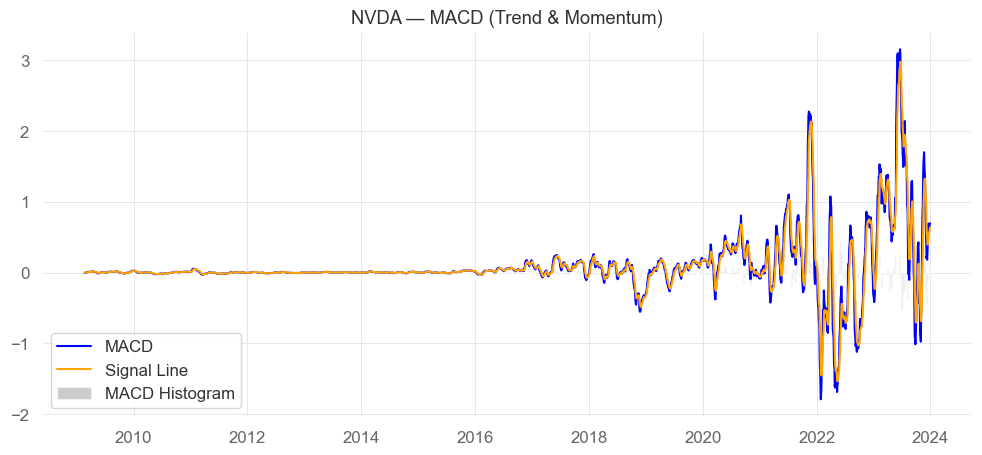

In [7]:
# ============================================
# MACD Plots for All Tickers
# ============================================

for t, df in data.items():

    plt.figure(figsize=(12,5))

    plt.plot(df["Date"], df["MACD"], label="MACD", color="blue")
    plt.plot(df["Date"], df["MACD_signal"], label="Signal Line", color="orange")

    # Histogram (MACD - Signal)
    plt.bar(
        df["Date"],
        df["MACD_hist"],
        label="MACD Histogram",
        color="gray",
        alpha=0.4
    )

    plt.title(f"{t} — MACD (Trend & Momentum)")
    plt.legend()
    plt.grid(True)
    plt.show()


### Portfolio Optimisation using PyNance
We use PyNance to optimise a portfolio using modern portfolio theory.

Two key optimisation goals:

### 1. Max Sharpe Ratio Portfolio
Selects weights that **maximize risk-adjusted return**  
(Highest return per unit of risk)

### 2. Minimum Variance Portfolio
Selects weights that **minimize overall portfolio volatility**  
(Lowest-risk diversified portfolio)

We use the tickers:
AAPL, AMZN, GOOG, META, MSFT, NVDA

The output includes:
- Expected returns
- Standard deviations
- Optimal portfolio weights for each strategy

In [8]:
# ============================================
# PyNance Portfolio Optimisation
# ============================================

from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

# Create the optimization object
portfolio = po.PortfolioCalculations(TICKERS)

# ===== Max Sharpe Portfolio =====
print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))     # risk/return table

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df"))     # dataframe of weights

# ===== Minimum Variance Portfolio =====
print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df"))


c:\Users\Jose\Desktop\KAIM8\WEEK1\programming\news-sentiment-stock-prediction\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Jose\Desktop\KAIM8\WEEK1\programming\news-sentiment-stock-prediction\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Jose\Desktop\KAIM8\WEEK1\programming\news-sentiment-stock-prediction\.venv\lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating k

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.34%
Standard Deviation               34.66%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL            0.00%
AMZN            0.00%
GOOG           50.30%
META            0.00%
MSFT            0.00%
NVDA           49.70%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.84%
Standard Deviation            19.92%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           35.74%
AMZN            0.00%
GOOG           14.28%
META            1.09%
MSFT           48.90%
NVDA            0.00%
